# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Versuche im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des "überwachten Lernens" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die *Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen*, an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?
2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?
3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?
4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 



#### Aufgabe 1
Ueberwachtest Lernen. Klassen sind korrekt bekannt, Wörter und Dokumente werden gezählt.<br>
Anzahl Trainingsdokumente Gesamt und wieviele Dokumente in der jeweiligen Klasse sind, welche ein Wort x enthalten.

#### Aufgabe 2
Basierend auf den Testdaten wird die Wahrscheinlichkeit berechnet, ob ein Dokument der Klasse 1 oder 2 zugeordnet werden kann, indem man fuer alle Woerter guckt ob sie mehr in Klasse 1 oder 2 vorkommen. Das Produkt der Ergebnisse fuehrt dann zu einer Wahrscheinlichkeit fuer die Klassen. Zugeordnet wird dann die Klasse mit der hoeheren Wahrscheinlichkeit.

Bsp: $$Anzahl dieser Klasse * \prod_{} Anteil Merkmale in Klasse $$ 
1: 0.67 * 0.2 * 0.1 = 0.0132 ---- 2: 0.33 * 0.1 * 0.1 = 0.0033
==> Merkmale sagen eher, dass es Klasse 1 ist.
(Quelle: https://www.youtube.com/watch?v=O2L2Uv9pdDA)

#### Aufgabe 3

Unabhaengigkeit der Merkmale. Es wird "naive" lediglich die Anzahl an Vorkomnissen betrachtet und nicht die Sprache an sich analysiert. Es koennten 2 Woerter in einer Klasse unabhaengig oefters vorkommen, sind sie jedoch auf bestimmte Weise kombiniert waeren sie eigentlich ausschlaggebend fuer eine andere Klasse. Dies wird jedoch nicht beruecksichtigt. Damit ist die Annahme nicht gegeben.

#### Aufgabe 4
Durch Multiplikation wuerde eine Merkmalwahrscheinlichkeit von 0 zu einem Gesamtergebnis von 0 fuehren ==> x nicht in Klasse 1 => Dokument kann niemals als Klasse 1 klassifiziert werden. <br>
Wenn man nicht weiß wie das Wort zuzuordnen ist, sollte man es mit zufällig auf eine Kategorie verteilen.
Alternativ kann man eine Konstante als initiale Wahrscheinlichkeit setzen.
Generell kommt es aber auf den Anwendungsfall drauf an wie man in so einem Fall handelt.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion *getwords(doc)*, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen *split(), strip('sep')* und *lower()* der Klasse *String*.  


Durch den word regeex (\w) werden alle sonderzeichen ignoriert.

In [43]:
import re
def getwords(doc):
  counts = dict()
  words_array = re.findall(r'\w+', doc.lower())
  for word in filter(lambda lower_word:  len(lower_word) >2 and len(lower_word) < 21, words_array):
    counts[word]  = 1 # = counts.get(word, 0) + 1 # if counting up
  return counts

test_string = "test. Test . asd .asdae2asd .asfas wortmitÜ!"
getwords(test_string)

{'test': 1, 'asd': 1, 'asdae2asd': 1, 'asfas': 1, 'wortmitü': 1}

<h2 style="color: DarkGoldenrod"> Fragwuerdig </h2>

Warum setzen wir die Werte auf 1??   
Sie werden werden nie wieder verwendet, wir haetten genausogut einen Array erstellen koennen.


## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion *getwords()* übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die *getwords()*-Funktion ausserhalb der Klasse definiert und beim Anlegen eines *Classifier*-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der *fc*-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der *cc*-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (*item*) und der entsprechenden Kategorisierung (*cat*) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert *getwords()*) in Worte zerlegt. Für jedes einzelne Wort wird dann *incf(self,f,cat)* aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt:
* Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
* und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

<h2 style="color: DarkGoldenrod"> Erklaerung </h2>

Zusaetzlich zu den gelisteten vorgaben haben wir die Klasse dynamisch gestaltet und um den text unterm untersten Punkt mit einzubringen, haben wir noch die Funktion *predictionResult(self,item)* mit eingebunden, diese berechnet alle Wahrscheinlichkeiten fuer ein item im Verhaeltnis zueinander sodass das Ergebnis anschaulicher ist und gibt die Vorhergesagte Kategorie aus.


In [68]:
import math

class Classifier:
  def __init__(self, function, categories):
    self.getfeatures = function
    self.fc = {} # {word: {Good: count, Bad: count},...}
    self.cc = {category: 0 for category in categories} # {Good: count, Bad: count}
  
  def incf(self,f,cat):
    cc_keys = [key for key in self.cc.keys()]
    if f not in self.fc:
      self.fc[f] = {category: 0 for category in cc_keys}
    self.fc[f][cat] += 1

  def incc(self, cat):
    self.cc[cat] = self.cc.get(cat,0) + 1

  def fcount(self, f, cat):
    if f in self.fc and cat in self.fc[f]:
      return self.fc[f][cat]
    return 0

  def catcount(self, cat):
    if(cat in self.cc):
      return self.cc[cat]
    return 0
  
  def totalcount(self):
    return sum(self.cc.values())
  
  def train(self, item, cat):
    for f in self.getfeatures(item):
      self.incf(f, cat)
    self.incc(cat)
  
  def fprob(self, f, cat):
    if not self.cc.get(cat) or self.cc.get(cat) == 0: 
      print("WHAT THE ****")
      return 0
    return self.fcount(f, cat) / self.catcount(cat)

  def weightedprob(self, f, cat):
    initprob = 1 / len(self.cc)
    basicprob = self.fprob(f, cat)
    count = sum([self.fcount(f, c) for c in self.cc.keys()])
    probability = (initprob + (count * basicprob)) / (1 + count)
    #print("initprob: ", initprob, "basicprob: ", basicprob, "count: ", count, "probability: ", probability)
    return probability
  
  def prob(self, item, cat):
    product = math.prod([self.weightedprob(f, cat) for f in self.getfeatures(item)])
    # product = 1
    # for f in self.getfeatures(item):
    #   product *= self.weightedprob(f, cat)
    return product * (self.catcount(cat) / self.totalcount())
  
  # ZUSATZ
  def predictionResult(self, item):
    class_predictions = {cat: self.prob(item, cat) for cat in self.cc.keys()}
    total_sum = sum(class_predictions.values())
    better_predictions = {cat: (class_predictions[cat]/total_sum) for cat in class_predictions}
    final_prediction = {'prediction' : max(class_predictions, key=class_predictions.get)}
    final_prediction.update(better_predictions)
    return final_prediction

In [69]:
# ZUSATZ: Testing
test = Classifier(getwords, ["Good", "Bad"])
print('cc:',test.cc == {"Good": 0, "Bad": 0})
test.incf("test", "Good")
test.incc("Good")
print('fc:',test.fc == {"test": {"Good": 1, "Bad": 0}})
test.incc("randy") # not in categories yet
print('catcounts:',test.catcount("randy") == 1, test.catcount("Good") == 1)
print('cc:',test.cc == {"Good": 1, "Bad": 0, "randy": 1})
print('fcounts:', test.fcount("test", "Good") == 1, test.fcount("asdasd", "Bad") ==0)
test.incf("test2", "Bad")
test.incc("Bad")
print('totacounts:',test.catcount("Good") == 1 and test.catcount("Bad") == 1 and test.catcount('randy') == 1 and test.totalcount() ==3)
print('fprob:',test.fprob("asd", "Good") == 0, test.fprob("test", "Good") == 1)
print('weightesprob:',test.weightedprob("test", "Good") == 2/3, test.weightedprob("test", "Bad") == 1/6, test.weightedprob("notinit", "Bad") == 1/3)

cc: True
fc: True
catcounts: True True
cc: True
fcounts: True True
totacounts: True
fprob: True True
weightesprob: True True True


## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in der
[NLP Vorlesung Document Classification](https://gitlab.mi.hdm-stuttgart.de/maucher/nlp/-/blob/master/Slides/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

<h2 style="color: DarkGoldenrod"> Erklaerung </h2>

Wir haben die Testdaten aus der Vorlesung uebernommen und in die train() Methode eingefuegt. Anschliessend haben wir die unsere eigene *predictionResult* funktion genutzt um die Wahrscheinlichkeiten fuer die Kategorien zu berechnen und die Vorhergesagte Kategorie auszugeben.

Durch das umrechnen der Eigentlichen Wahrscheinlichkeiten 0.029 und 0.0125 zu 0.7 und 0.3 ist die Vorhersage leichter zu verstehen

In [46]:
c1 = Classifier(getwords, ["good", "bad"])
c1.train('nobody owns the water', 'good')
c1.train('the quick rabbit jumps fences', 'good')
c1.train('buy pharmaceuticals now', 'bad')
c1.train('make quick money at the online casino', 'bad')
c1.train('the quick brown fox jumps', 'good')
c1.train('next meeting is at night', 'good')
c1.train('meeting with your superstar', 'bad')
c1.train('money like water', 'bad')
print("")
print(c1.prob('the money jumps', 'good'),c1.prob('the money jumps', 'bad')) # WORKS
print(c1.predictionResult('the money jumps'))
#Testing
print('good:',0.029 / (0.29 + 0.125), 'bad:', 0.125 / (0.29 + 0.125))


0.029166666666666664 0.012499999999999999
{'prediction': 'good', 'good': 0.7, 'bad': 0.3}
good: 0.06987951807228916 bad: 0.30120481927710846


## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.
2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://gitlab.mi.hdm-stuttgart.de/maucher/nlp/-/blob/master/Slides/03TextClassification.pdf) definiert.
3. Diskutieren Sie das Ergebnis
4. Wie könnte die Klassifikationsgüte durch Modifikation der *getwords()*-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

In [47]:
import feedparser
# Added this Line
feeds = {}

def countFeed(feedList, title, should_print=False):
    if should_print:
        print(f"--------------------News from {title}------------------------")
    count = 0
    for feed in feedList:
        if should_print:
            print()
            print("*"*30)
            print(feed)
        f=feedparser.parse(feed)
        for e in f.entries:
            if hasattr(e, 'title') and hasattr(e, 'description'):
                if should_print:
                    print('\n---------------------------')
                fulltext=stripHTML(e.title+' '+e.description)
                # Added these Line
                if title not in feeds:
                    feeds[title] = []
                feeds[title].append(fulltext)
                if should_print:
                    print(fulltext)
                count += 1
    if should_print:
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
    return count

def stripHTML(h):
    p=''
    s=0
    for c in h:
        if c=='<': 
            s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p


trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/']

test=['http://rss.golem.de/rss.php?r=sw&feed=RSS0.91',
      'http://newsfeed.zeit.de/politik/index',  
      'http://www.welt.de/?service=Rss']

countnews={}

countnews['tech']=countFeed(trainTech, 'trainTech', should_print=True)
countnews['nontech']=countFeed(trainNonTech, 'trainNonTech')
countnews['testTech']=countFeed(test[:1], 'testTech')
countnews['testNonTech']=countFeed(test[1:], 'testNonTech')

print('Number of used trainings samples in categorie tech',countnews['tech'])
print('Number of used trainings samples in categorie notech',countnews['nontech'])
print('Number of used test samples',countnews['testTech'] + countnews['testNonTech'])
print('--'*30)

--------------------News from trainTech------------------------

******************************
http://rss.chip.de/c/573/f/7439/index.rss

******************************
http://rss1.t-online.de/c/11/53/06/84/11530684.xml

******************************
http://www.computerbild.de/rssfeed_2261.xml?node=13

---------------------------
Black Friday bei Saturn: Die Top-Deals im Überblick Wer Schnäppchen sucht, wird hier fündig: Die "Black Friday Saturn"-Angebote bieten hohes Sparpotenzial – schon heute! Der Technikriese hat im Rahmen der "Black Week" viele Deals zum kleinen Preis im Programm.

---------------------------
WM 2022 Katar: Alle Infos – Spiele, Prognosen, Ergebnisse, Quoten Die WM 2022 in Katar läuft, die große Enttäuschung ist da: Deutschland verliert 1:2 gegen Japan. Die nächsten Spiele, die treffendsten Prognosen, die coolsten Sportwetten, die höchsten Quoten – alle Infos!

---------------------------
Black Friday bei Amazon & Co.: Die besten Deals im Überblick! Ende November

<h2 style="color: DarkGoldenrod"> Erklaerung </h2>

1. Da die feeds nicht als strings in der gegebenen Funktion gespeichert wurden, haben wir ein paar Zeilen die das tun hinzugefuegt.

2. TODO KEIN PLAN OB MEIN SHIT RICHTIG IST
3. TODO
4. TODO

In [78]:
# Aufgabe 1
print(countnews)
print({cat: len(feeds[cat]) for cat in feeds.keys()})

c1 = Classifier(getwords, ["Tech", "NonTech"])
for news in feeds.get("trainTech"):
    c1.train(news, 'Tech')
for news in feeds.get("trainNonTech"):
    c1.train(news, 'NonTech')

{'tech': 80, 'nontech': 101, 'testTech': 40, 'testNonTech': 45}
{'trainTech': 80, 'trainNonTech': 101, 'testTech': 40, 'testNonTech': 45}


In [49]:
for news in feeds.get("testTech"):
  if news.count("Erotik") > 0:
    print(news)


Erotik, Pornos und NSFW: Unstable Diffusion trainiert KI für pornografische Bilder Mithilfe der KI Stable Diffusion trainiert sich eine Community ihre eigene Software. Damit sollen pornografische Bilder generiert werden. ( Deep Learning ,  KI )  


In [77]:
counter = 0
for news in feeds.get("trainNonTech"):
    print(news)
    print("-"*30)


Raumfahrt: Die neuen Esa-Astronauten stehen fest 
------------------------------
Missbrauchsskandal: Staatsanwaltschaft leitet weiteres Verfahren gegen Kardinal Woelki ein Wusste der Kölner Kardinal von Missbrauchshinweisen gegen einen Priester? Das bestritt Woelki vor Gericht. Eine Zeugin gibt neue Hinweise – und löst ein Verfahren aus.
------------------------------
Energie: Bistum Speyer will 2023 Kamera an Kohls Grab abstellen 
------------------------------
Transport: Vier von fünf Paketen werden am nächsten Werktag zugestellt 
------------------------------
Polizeieinsatz: Mann in Unterhose greift zwei Gäste in Hostel an 
------------------------------
Prozesse: Abschiebeverbot nach Griechenland: Gericht gibt Syrern Recht 
------------------------------
Bundespräsident: Steinmeier erinnert Journalisten an besondere Verantwortung 
------------------------------
Umweltschutz: Moorschützer kritisieren Vergabe von EU-Agrarmitteln im Land 
------------------------------
Arbeitskampf: 

resultsTech: correct: 4 incorrect: 36
resultsNonTech: correct: 44 incorrect: 1

Confusion Matrix: [[44  1]
 [36  4]]
Accuracy: 0.5647058823529412

Precision Tech: 0.8
Precision NonTech: 0.55

Recall Tech: 0.1
Recall NonTech: 0.9777777777777777

F1-Score Tech: 0.1777777777777778
F1-Score NonTech: 0.7040000000000001


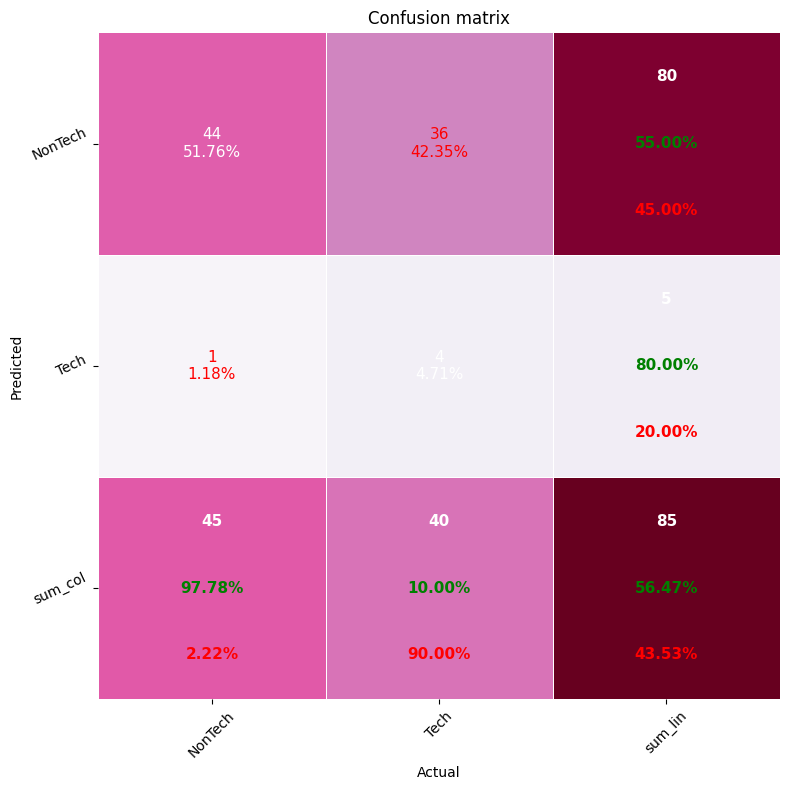

In [79]:
# Aufgabe 2
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import numpy as np
import pandas as pd
from pretty_confusion_matrix import pp_matrix

correct_tags = ["Tech" for i in range(countnews['testTech'])] + ["NonTech" for i in range(countnews['testNonTech'])]
resultsTech = [c1.predictionResult(news).get("prediction") for news in feeds.get("testTech")]
resultsNonTech = [c1.predictionResult(news).get('prediction') for news in feeds.get("testNonTech")]
predictedTags = resultsTech + resultsNonTech
print("resultsTech:", "correct:", resultsTech.count("Tech"), "incorrect:" , resultsTech.count("NonTech"))
print("resultsNonTech:", "correct:",resultsNonTech.count("NonTech"), "incorrect:", resultsNonTech.count("Tech"))
print("")
print("Confusion Matrix:",confusion_matrix(correct_tags, predictedTags))
print("Accuracy:", accuracy_score(correct_tags, predictedTags))
print("")
print("Precision Tech:", precision_score(correct_tags, predictedTags, pos_label="Tech")) # TODO brauchen wir hier average="weighted" oder so?
print("Precision NonTech:", precision_score(correct_tags, predictedTags, pos_label="NonTech"))
print("")
print("Recall Tech:", recall_score(correct_tags, predictedTags, pos_label="Tech"))
print("Recall NonTech:", recall_score(correct_tags, predictedTags, pos_label="NonTech"))
print("")
print("F1-Score Tech:", f1_score(correct_tags, predictedTags, pos_label="Tech"))
print("F1-Score NonTech:", f1_score(correct_tags, predictedTags, pos_label="NonTech"))

# For some reason we had to flip around the order of the correct_tags maybe coz there are more NonTech than Tech
df= pd.DataFrame(confusion_matrix(correct_tags, predictedTags), index=[ 'NonTech','Tech'], columns=[ 'NonTech','Tech'])
cmap = 'PuRd'
pp_matrix(df, cmap=cmap)


### Aufgabe 3

**TODO**

### Aufgabe 4

# TODO

In [52]:
# TESTING if we are right haha
PrecisionTech = 0.7346938775510204
PrecisionNonTech = 0.8888888888888888

RecallTech= 0.9
RecallNonTech= 0.7111111111111111

F1ScoreTech =  0.8089887640449438
F1ScoreNonTech = 0.7901234567901234

F1T = 2* (PrecisionTech * RecallTech) / (PrecisionTech + RecallTech)
F1NT = 2* (PrecisionNonTech * RecallNonTech) / (PrecisionNonTech + RecallNonTech)
print("F1T:", F1T)
print("F1NT:", F1NT)

F1T: 0.8089887640449438
F1NT: 0.7901234567901234


In [53]:
# ZUSATZ 
# TODO

![](https://media.discordapp.net/attachments/938081916877608488/1045009524723028056/image.png)

In [84]:
test = getwords("Hallo ich bin ein Test")
print(test)
for word in test:
    print(word)

{'hallo': 1, 'ich': 1, 'bin': 1, 'ein': 1, 'test': 1}
hallo
ich
bin
ein
test
